In [1]:
### Gene usage analysis ###
# all combined data sets

# Quantifying the VDJ gene based on either sequence count or clonotypes.
# options are based on "gene", "allele", "family"
# duplicate count does not work... missing the column. 

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

require(data.table)
db <- as.data.frame(fread("../../changeo_10x/a_r_vac_wt.tsv"))

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [3]:
# Quantify usage at the gene level.
# Printing the first 4 genes.
gene <- countGenes(db, groups="sample_id", gene="v_call", mode="gene")
head(gene, n=4)

sample_id,gene,seq_count,seq_freq
<chr>,<chr>,<int>,<dbl>
wt,IGHV1-26,254,0.05677246
vac,IGHV1-26,185,0.06045752
wt,IGHV3-6,170,0.03799732
a,IGHV1-26,165,0.06081828


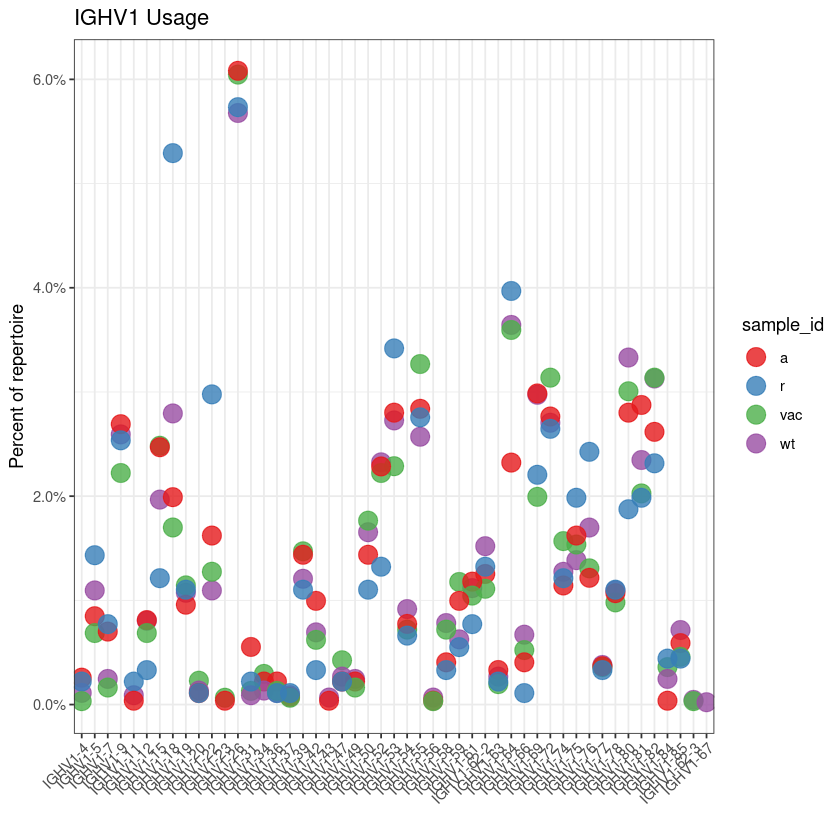

In [4]:
# Assign sorted levels and subset to IGHV1
ighv1 <- gene %>%
    mutate(gene=factor(gene, levels=sortGenes(unique(gene), method="name"))) %>%
    filter(getFamily(gene) == "IGHV1")

# Plot V gene usage in the IGHV1 family by sample
g1 <- ggplot(ighv1, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("IGHV1 Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g1)

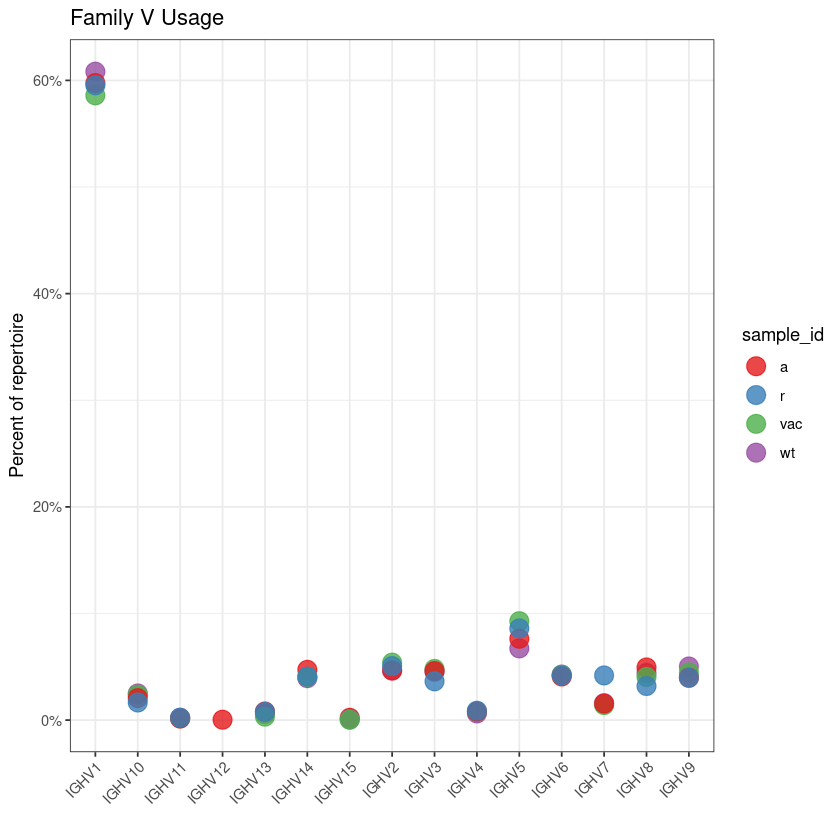

In [7]:
# Quantify V gene based on the family.
family_v <- countGenes(db, gene="v_call", groups="sample_id", mode="family")

# Plot V family usage by sample
g2 <- ggplot(family_v, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("Family V Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g2)

In [8]:
# Quantify V family clonal usage by sample and isotype
family <- countGenes(db, gene="v_call", groups=c("sample_id", "c_call"), 
                     clone="clone_id", mode="family")
head(family, n=4)

sample_id,c_call,gene,clone_count,clone_freq
<chr>,<chr>,<chr>,<int>,<dbl>
a,,IGHV2,1,1.0000000
a,IGHA,IGHV2,1,0.1666667
a,IGHA,IGHV6,1,0.1666667
a,IGHG1,IGHV6,1,0.2500000


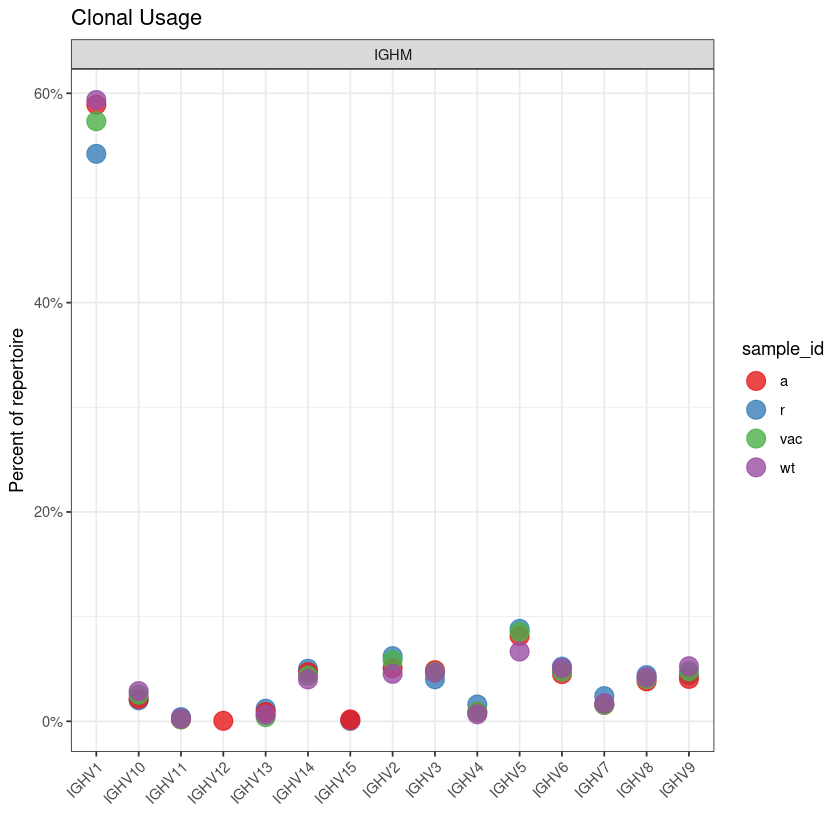

In [12]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHM", "IGHG", "IGHD", "IGHA"))
# Plot V family clonal usage by sample and isotype
g3 <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    ggtitle("Clonal Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(aes(color=sample_id), size=5, alpha=0.8) +
    facet_grid(. ~ c_call)
plot(g3)

Warning message in countGenes(db, gene = "v_call", groups = c("sample_id", "c_call"), :
“The column duplicate_count was not found”


ERROR: Error: Problem with `summarise()` input `copy_count`.
[31m✖[39m object 'duplicate_count' not found
[34mℹ[39m Input `copy_count` is `sum(duplicate_count, na.rm = TRUE)`.
[34mℹ[39m The error occurred in group 1: sample_id = "a", c_call = "", v_call = "IGHV2".
